# DATA PREPROCESSING AND FEATURE ENGINEERING

# IMPORTING AND LOADING DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# CHECKING FOR NULL/MISSING VALUES & DATA CLEANING

In [3]:
df.shape

(891, 12)

In [4]:
df.drop('Cabin', axis=1, inplace=True)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [7]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [8]:
#df.tail(50)

In [9]:
most_frequent_value = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_value, inplace=True)

In [10]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
# ENCODING EMBARKED
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2


# SCALING 

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Fare'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.271174,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.472229,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.321438,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.434531,2
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.434531,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.334004,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.233476,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,W./C. 6607,0.367921,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,0.321438,0


# CHECKING & REMOVING OUTLIERS USING IQR

<Axes: xlabel='Age'>

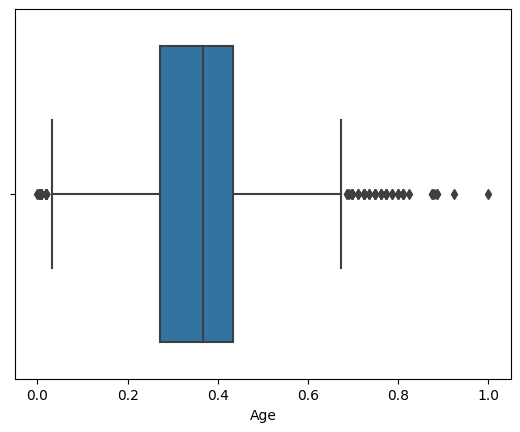

In [14]:
import seaborn as sns
sns.boxplot(x=df["Age"])

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df_no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.271174,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.472229,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.321438,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.434531,2
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.434531,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.334004,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.233476,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,W./C. 6607,0.367921,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,0.321438,0


In [16]:
print(lower_bound)
print(upper_bound)

0.026137220407137424
0.6795677305855742


<Axes: xlabel='Age'>

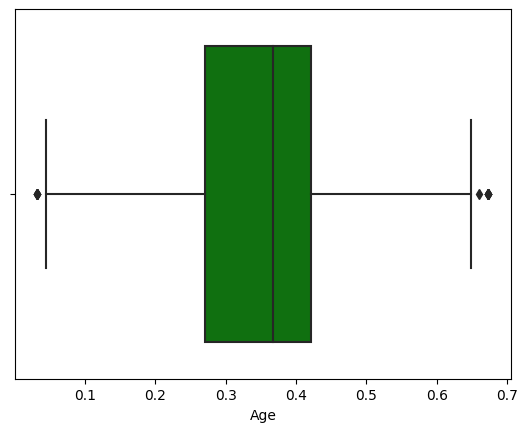

In [17]:
sns.boxplot(x=df_no_outliers["Age"],color='g')

# USING LocalOutlierFactor(LOF)

In [18]:
from sklearn.neighbors import LocalOutlierFactor
ages = df['Age'].values.reshape(-1, 1)
LOF = LocalOutlierFactor(n_neighbors=20)
outliers = LOF.fit_predict(ages)
df['Outlier'] = outliers
df_no_outliers2 = df[df['Outlier'] != -1]
df_no_outliers2 = df_no_outliers2.drop(columns=['Outlier'])

In [19]:
df_no_outliers2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.271174,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.472229,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.434531,2
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.434531,2
5,6,0,3,"Moran, Mr. James",male,0.367921,0,0,330877,0.367921,1
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,0.484795,0,5,382652,0.484795,1
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.334004,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.233476,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,W./C. 6607,0.367921,2


<Axes: xlabel='Age'>

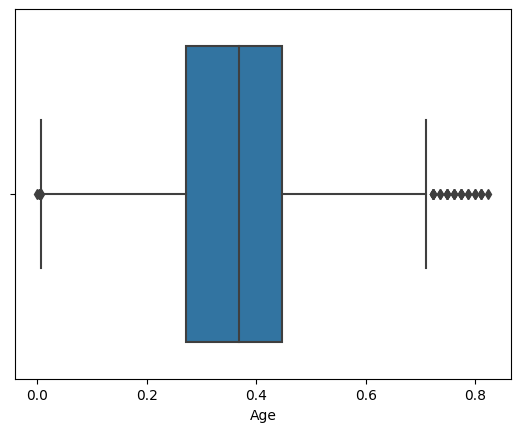

In [20]:
sns.boxplot(x=df_no_outliers2["Age"])

# Boxplots after using IQR and LOF shows IQR performed better in this case

# OUTLIERS USING Z-SCORE

In [21]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()
df['Z_score'] = (df['Age'] - mean_age) / std_age # formula of z_score
Z_score_OUTLIER = df[df['Z_score'].abs() <= 3] # Filtering outliers (Z-score > 3 or < -3)
Z_score_OUTLIER = Z_score_OUTLIER.drop(columns=['Z_score'])

In [22]:
Z_score_OUTLIER

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.271174,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.472229,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.321438,2,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.434531,2,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.434531,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.334004,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.233476,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,W./C. 6607,0.367921,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,0.321438,0,-1
